# Clustering - Kmeans


##1. Simple walk through example

In [2]:
# You will use the matplotlib.pyplot library, sklearn.cluster etc. etc.
%matplotlib inline
import matplotlib.pyplot
import sklearn.cluster
import sklearn.datasets
import pandas as pd

In [3]:
# scikit learn includes a number of sample data sets. The data about
# iris flowers clusters very well
iris_data = sklearn.datasets.load_iris().data


In [21]:
# Choose three nice contrasting colours and create a pandas array listing them
colours = pd.Series(data =["red", "blue", "cyan", "purple", "pink"])

In [5]:
# Create a sklearn.cluster.KMeans object to work with 3 clusters
km = sklearn.cluster.KMeans(init ='k-means++', n_clusters = 3)

In [17]:
# Cluster this iris_data
cluster = km.fit_predict(iris_data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

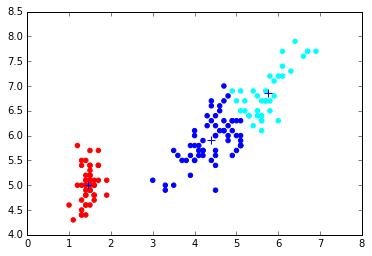

In [26]:
# Draw a scatter plot using columns [:,2] and [:,0] (the petal length and the sepal length)
# Use your colour array (indexed by the cluster) for the colouring
# When you have that working, draw the cluster_centers_ on the scatter plot as well
matplotlib.pyplot.scatter(iris_data[:,2],
                         iris_data[:,0],
                         color = colours[cluster])

matplotlib.pyplot.scatter(km.cluster_centers_[:,2],
                         km.cluster_centers_[:,0],
                         marker ="+", s=50)

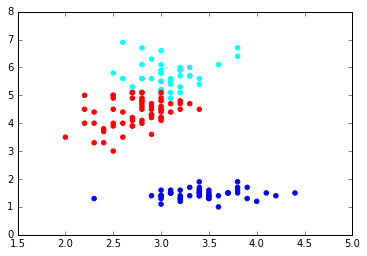

In [10]:
# (Optional) What does a scatter plot of some of the other columns look like?
matplotlib.pyplot.scatter(iris_data[:,1],
                         iris_data[:,2],
                         color = colours[cluster])

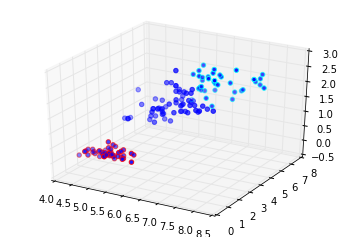

In [38]:
# (Optional) What does a 3D plot look like?
from mpl_toolkits.mplot3d import Axes3D
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_data[:,0], iris_data[:,2], iris_data[:,3], color = colours[cluster])

## Same again, using DBSCAN

In [14]:
# Create a DBSCAN clusterer. Try eps=0.4 with min_samples=3
dbsc = sklearn.cluster.DBSCAN(eps=0.4, min_samples=3)

In [20]:
# Try to cluster that iris_data
dbsc_cluster = dbsc.fit_predict(iris_data)

In [19]:
# How many clusters does it find? (Remember that -1 means "outlier", 
# and that the clusters are number starting with cluster 0)
dbsc_cluster

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  3,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1, -1,  3,
        3,  3,  3, -1, -1, -1, -1, -1,  3,  3,  3,  3, -1,  3,  3, -1, -1,
       -1,  3,  3, -1,  3,  3,  3,  3,  3,  3,  3, -1, -1,  3,  3, -1, -1,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3])

In [50]:
# Colouring is a little more difficult: make a dictionary. Set
# the keys to being all possible cluster numbers (including -1);
# set the corresponding values to different colours
dbsc_colours = {}
for x in range (0, 5):
    dbsc_colours[x-1] = colours[x]

dbsc_colours

{-1: 'red', 0: 'blue', 1: 'cyan', 2: 'purple', 3: 'pink'}

In [51]:
# Create a list of colour annotations by mapping the fit_predict()
# output through your dictionary. e.g. you could create a list
# comprehension, or you could use the map() function, or iterate
# through the fit_predict() output
def fit_colour(x):
    return dbsc_colours[x]

map(fit_colour, dbsc_cluster)


['blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'purple',
 'cyan',
 'cyan',
 'purple',
 'cyan',
 'red',
 'cyan',
 'red',
 'cyan',
 'cyan',
 'cyan',
 'red',
 'cyan',
 'pink',
 'cyan',
 'pink',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'pink',
 'cyan',
 'cyan',
 'cyan',
 'red',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'purple',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'purple',
 'cyan',
 'red',
 'pink',
 'pink',
 'pink',
 'pink',
 'red',
 'red',
 'red',
 'red',
 'red',
 'pink',
 'pink

In [ ]:
# Create a scatter plot. How does it compare to the KMeans clustering?

## Finding an appropriate number of clusters with KMeans

And we'll also use the Silhouette coefficient

In [ ]:
# Create 15 different KMeans clusterers, each
# with values 1..15 n_clusters.
# Create a bunch of different models

In [ ]:
# Use these 15 clusterers on the iris_data

In [ ]:
# Calculate the silhouette scores for these clusterings (there might be problems with
# calculating a silhouette score for the n_clusters=1 clusterer)

In [ ]:
# Plot the silhouette score against the number of clusters.
# Are there "elbows" in this graph? (i.e. points where adding extra
# clusters doesn't make that much extra difference to the silhouette score)